<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

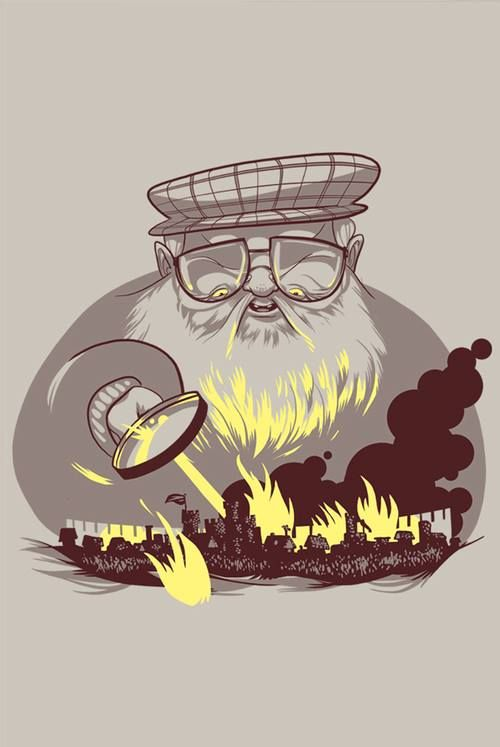

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **DateoFdeath**: дата смерти

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [4]:
!gdown 1ANEFC_GKeJm4GCx1Xd202gkAgqK2Bm4S # test dataset
!gdown 1oSX7B5YhS6vQseTsQZYryu44HxSq6ZWV # train dataset

'gdown' is not recognized as an internal or external command,
operable program or batch file.
'gdown' is not recognized as an internal or external command,
operable program or batch file.


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np# ...

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [6]:
data = df = pd.read_csv('./data/game_of_thrones_train.csv', index_col='S.No')

data.head() # ...

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [7]:
# Выводим список всех столбцов в датафрейме
print(data.columns)


Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'mother', 'father',
       'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity',
       'isAlive'],
      dtype='object')


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [8]:
# Проверяем количество пропущенных значений в каждом столбце
missing_values = data.isnull().sum()
print("Количество пропущенных значений в каждом столбце:")
print(missing_values)


Количество пропущенных значений в каждом столбце:
name                   0
title                840
male                   0
culture             1069
dateOfBirth         1278
mother              1539
father              1535
heir                1536
house                381
spouse              1357
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isAliveMother       1539
isAliveFather       1535
isAliveHeir         1536
isAliveSpouse       1357
isMarried              0
isNoble                0
age                 1278
numDeadRelations       0
popularity             0
isAlive                0
dtype: int64


In [9]:
# Отбираем только те столбцы, где есть пропущенные значения
columns_with_nan = missing_values[missing_values > 0]
print("\nСтолбцы с пропущенными значениями:")
print(columns_with_nan)



Столбцы с пропущенными значениями:
title             840
culture          1069
dateOfBirth      1278
mother           1539
father           1535
heir             1536
house             381
spouse           1357
isAliveMother    1539
isAliveFather    1535
isAliveHeir      1536
isAliveSpouse    1357
age              1278
dtype: int64


In [10]:
# Обработка числовых столбцов
numeric_columns = ['age', 'numDeadRelations']

for col in numeric_columns:
    if col in columns_with_nan:
        median_value = data[col].median()
        data[col].fillna(median_value, inplace=True)
        print(f"Пропущенные значения в столбце '{col}' заполнены медианой: {median_value}")


Пропущенные значения в столбце 'age' заполнены медианой: 24.0


C:\Temp\ipykernel_3840\834692555.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(median_value, inplace=True)


In [11]:
# Обработка категориальных столбцов
categorical_columns = ['title', 'culture', 'house', 'mother', 'father', 'heir', 'spouse']

for col in categorical_columns:
    if col in columns_with_nan:
        data[col].fillna('Unknown', inplace=True)
        print(f"Пропущенные значения в столбце '{col}' заполнены значением 'Unknown'")


Пропущенные значения в столбце 'title' заполнены значением 'Unknown'
Пропущенные значения в столбце 'culture' заполнены значением 'Unknown'
Пропущенные значения в столбце 'house' заполнены значением 'Unknown'
Пропущенные значения в столбце 'mother' заполнены значением 'Unknown'
Пропущенные значения в столбце 'father' заполнены значением 'Unknown'
Пропущенные значения в столбце 'heir' заполнены значением 'Unknown'
Пропущенные значения в столбце 'spouse' заполнены значением 'Unknown'


C:\Temp\ipykernel_3840\3840337008.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna('Unknown', inplace=True)


In [12]:
# Обработка бинарных столбцов
binary_columns = ['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse']

for col in binary_columns:
    if col in columns_with_nan:
        data[col].fillna(0, inplace=True)
        print(f"Пропущенные значения в столбце '{col}' заполнены значением 0")


Пропущенные значения в столбце 'isAliveMother' заполнены значением 0
Пропущенные значения в столбце 'isAliveFather' заполнены значением 0
Пропущенные значения в столбце 'isAliveHeir' заполнены значением 0
Пропущенные значения в столбце 'isAliveSpouse' заполнены значением 0


C:\Temp\ipykernel_3840\406738985.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(0, inplace=True)


In [13]:
# Проверяем количество пропусков в 'dateOfBirth' и 'DateoFdeath'
if 'dateOfBirth' in columns_with_nan:
    print(f"Столбец 'dateOfBirth' содержит {columns_with_nan['dateOfBirth']} пропущенных значений.")

if 'DateoFdeath' in columns_with_nan:
    print(f"Столбец 'DateoFdeath' содержит {columns_with_nan['DateoFdeath']} пропущенных значений.")

# Принимаем решение удалить эти столбцы из-за большого количества пропусков
data.drop(columns=['dateOfBirth', 'DateoFdeath'], inplace=True)
print("Столбцы 'dateOfBirth' и 'DateoFdeath' удалены из датафрейма.")


Столбец 'dateOfBirth' содержит 1278 пропущенных значений.


KeyError: "['DateoFdeath'] not found in axis"

In [ ]:
# Повторно проверяем наличие пропущенных значений
missing_values_after = data.isnull().sum()
columns_with_nan_after = missing_values_after[missing_values_after > 0]

if columns_with_nan_after.empty:
    print("\nПосле обработки пропущенных значений в датафрейме больше нет NaN значений.")
else:
    print("\nОстались пропущенные значения в следующих столбцах:")
    print(columns_with_nan_after)


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [ ]:
# Создаем признак 'isPopular' на основе 'popularity score'
data['isPopular'] = data['popularity'].apply(lambda x: 1 if x > 0.5 else 0)


In [ ]:
# Создаем признак 'boolDeadRelations' на основе 'numDeadRelations'
data['boolDeadRelations'] = data['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)


In [ ]:
# Словарь для объединения культур
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari', 'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

# Приводим столбец 'culture' к нижнему регистру
data['culture'] = data['culture'].str.lower()

# Функция для замены значений в 'culture'
def simplify_culture(culture):
    for key, values in cult.items():
        if culture in values:
            return key
    return culture

# Применяем функцию к столбцу 'culture'
data['culture'] = data['culture'].apply(simplify_culture)


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [ ]:
# Список столбцов для удаления
columns_to_drop = ['name', 'mother', 'father', 'heir', 'spouse', 'numDeadRelations', 'popularity']

# Удаляем столбцы из датафрейма
data.drop(columns=columns_to_drop, inplace=True)


In [ ]:
# Выводим обновленный список столбцов
print("Оставшиеся столбцы:")
print(data.columns.tolist())


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [ ]:
# Проверяем тип данных целевой переменной 'isAlive'
print("Тип данных 'isAlive':", data['isAlive'].dtype)

# Проверяем уникальные значения целевой переменной
print("Уникальные значения 'isAlive':", data['isAlive'].unique())

# Проверяем количество наблюдений в каждом классе
class_counts = data['isAlive'].value_counts()
print("\nКоличество наблюдений в каждом классе:")
print(class_counts)

# Проверяем процентное соотношение классов
class_percentages = data['isAlive'].value_counts(normalize=True) * 100
print("\nПроцентное соотношение классов:")
print(class_percentages)


**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [ ]:
# Импортируем LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Список категориальных признаков
categorical_features = ['title', 'culture', 'house']

# Создаем экземпляр LabelEncoder
le = LabelEncoder()

# Применяем LabelEncoder к каждому категориальному признаку
for col in categorical_features:
    data[col] = le.fit_transform(data[col])

# Проверяем преобразование
print(data[categorical_features].head())


In [ ]:
# Список количественных признаков (числовые признаки, кроме целевой переменной)
numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove('isAlive')

# Строим корреляционную матрицу
corr_matrix = data[numeric_features].corr()

# Визуализируем корреляционную матрицу
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляция между количественными признаками')
plt.show()

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [ ]:
# Выбираем числовые признаки
numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove('isAlive')  # Исключаем целевую переменную

# Вычисляем корреляцию между числовыми признаками и целевой переменной
corr_with_target = data[numeric_features + ['isAlive']].corr()['isAlive'].sort_values(ascending=False)

# Выводим результаты
print("Корреляция числовых признаков с целевой переменной 'isAlive':")
print(corr_with_target)


In [ ]:
# Котегориальные признаки

In [ ]:
#  Создайте переменные X и y

# Создаем переменную X, содержащую только признаки
X = data.drop('isAlive', axis=1)

# Создаем переменную y, содержащую только значения целевой переменной
y = data['isAlive']


In [ ]:
# Удаляем дубликаты столбцов из X
X = X.loc[:, ~X.columns.duplicated()]
print("Дубликаты столбцов удалены из X.")


In [ ]:
# Проверяем наличие дубликатов в X
duplicate_columns_X = X.columns[X.columns.duplicated()]
print("Дубликаты столбцов в X:", duplicate_columns_X.tolist())



In [ ]:
for col in categorical_features:
    print(f"\nОбработка столбца: {col}")
    print(f"Тип данных X['{col}']: {type(X[col])}")
    print(f"Форма X['{col}']: {X[col].shape}")


In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])


In [ ]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X, y, discrete_features='auto')

# Создаем серию с результатами
mi_scores = pd.Series(mi, index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

# Выводим результаты
print("\nВзаимная информация между признаками и целевой переменной 'isAlive':")
print(mi_scores)


In [ ]:
# Использование модели случайного леса для определения важности признаков

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Разделяем данные на признаки и целевую переменную
X = data.drop('isAlive', axis=1)
y = data['isAlive']

# Преобразуем категориальные признаки с помощью One-Hot Encoding
X = pd.get_dummies(X, columns=categorical_features)

# Разделяем данные на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучаем модель случайного леса
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Получаем важность признаков
importances = rf_model.feature_importances_

# Создаем серию с важностями признаков
feature_importances = pd.Series(importances, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Выводим результаты
print("Важность признаков по версии случайного леса:")
print(feature_importances)


**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [ ]:
# Создаем переменную X, содержащую только признаки
X = data.drop('isAlive', axis=1)

# Создаем переменную y, содержащую только значения целевой переменной
y = data['isAlive']


**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [14]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [15]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [16]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

NameError: name 'X_train' is not defined

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [17]:
# RandomForestClassifier
# Шаг 1. создание модели
rf_classifier = RandomForestClassifier()

# Шаг 2. обучение модели
rf_classifier.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_rf = rf_classifier.predict(X_test)


NameError: name 'X_train' is not defined

In [18]:
# AdaBoostClassifier
# Шаг 1. создание модели
ada_boost = AdaBoostClassifier()

# Шаг 2. обучение модели
ada_boost.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_ada = ada_boost.predict(X_test)


NameError: name 'X_train' is not defined

In [19]:
# GaussianProcessClassifier
# Шаг 1. создание модели
gpc = GaussianProcessClassifier()

# Шаг 2. обучение модели
gpc.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_gpc = gpc.predict(X_test)


NameError: name 'X_train' is not defined

In [20]:
# GaussianNB
# Шаг 1. создание модели
gnb = GaussianNB()

# Шаг 2. обучение модели
gnb.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_gnb = gnb.predict(X_test)


NameError: name 'X_train' is not defined

In [21]:
# KNeighborsClassifier
# Шаг 1. создание модели
knn_classifier = KNeighborsClassifier()

# Шаг 2. обучение модели
knn_classifier.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_knn = knn_classifier.predict(X_test)


NameError: name 'X_train' is not defined

In [22]:
# SVC
# Шаг 1. создание модели
svc_model = SVC()

# Шаг 2. обучение модели
svc_model.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_svc = svc_model.predict(X_test)


NameError: name 'X_train' is not defined

In [23]:
# DecisionTreeClassifier
# Шаг 1. создание модели
dt_classifier = DecisionTreeClassifier()

# Шаг 2. обучение модели
dt_classifier.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_dt = dt_classifier.predict(X_test)


NameError: name 'X_train' is not defined

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [24]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [25]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

NameError: name 'X_test' is not defined

In [26]:
# RandomForestClassifier
# Шаг 3. Предсказание на тестовых данных
y_pred_rf = rf_classifier.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy : %.4f" % accuracy_rf)


NameError: name 'X_test' is not defined

In [27]:
# AdaBoostClassifier
# Шаг 3. Предсказание на тестовых данных
y_pred_ada = ada_boost.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("Accuracy : %.4f" % accuracy_ada)


NameError: name 'X_test' is not defined

In [28]:
# GaussianProcessClassifier
# Шаг 3. Предсказание на тестовых данных
y_pred_gpc = gpc.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_gpc = accuracy_score(y_test, y_pred_gpc)
print("Accuracy : %.4f" % accuracy_gpc)


NameError: name 'X_test' is not defined

In [29]:
# GaussianNB
# Шаг 3. Предсказание на тестовых данных
y_pred_gnb = gnb.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print("Accuracy : %.4f" % accuracy_gnb)


NameError: name 'X_test' is not defined

In [30]:
# KNeighborsClassifier
# Шаг 3. Предсказание на тестовых данных
y_pred_knn = knn_classifier.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy : %.4f" % accuracy_knn)


NameError: name 'X_test' is not defined

In [31]:
# SVC
# Шаг 3. Предсказание на тестовых данных
y_pred_svc = svc_model.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Accuracy : %.4f" % accuracy_svc)


NameError: name 'X_test' is not defined

In [32]:
# DecisionTreeClassifier
# Шаг 3. Предсказание на тестовых данных
y_pred_dt = dt_classifier.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy : %.4f" % accuracy_dt)


NameError: name 'X_test' is not defined

Аналогичным образом посчитайте метрику accuracy для остальных моделей

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [33]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [34]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

FileNotFoundError: [Errno 2] No such file or directory: '/content/submission.csv'

In [ ]:
#  Загрузка тестового набора данных
test_data = pd.read_csv('/content/game_of_thrones_test_old.csv', index_col='S.No')

In [35]:
# Лучшая модель: AdaBoostClassifier с accuracy 0.7949.

In [36]:
# Предобработка тестовых данных

# Обработка пропущенных значений в тестовых данных
test_data['age'].fillna(data['age'].median(), inplace=True)

categorical_columns = ['title', 'culture', 'house']
for col in categorical_columns:
    test_data[col].fillna('Unknown', inplace=True)

binary_columns = ['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse']
for col in binary_columns:
    test_data[col].fillna(0, inplace=True)

# Создание новых признаков в тестовых данных
test_data['isPopular'] = test_data['popularity'].apply(lambda x: 1 if x > 0.5 else 0)
test_data['boolDeadRelations'] = test_data['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)

# Упрощение признака 'culture'
test_data['culture'] = test_data['culture'].str.lower()

def simplify_culture(culture):
    for key, values in cult.items():
        if culture in values:
            return key
    return culture

test_data['culture'] = test_data['culture'].apply(simplify_culture)

# Удаление ненужных столбцов
columns_to_drop = ['name', 'mother', 'father', 'heir', 'spouse', 'numDeadRelations', 'popularity']
test_data.drop(columns=columns_to_drop, inplace=True)

# Кодирование категориальных признаков
from sklearn.preprocessing import LabelEncoder

for col in categorical_columns:
    le = LabelEncoder()
    test_data[col] = le.fit_transform(test_data[col])

# Убедимся, что у тестовых данных те же столбцы, что и у обучающих
missing_cols = set(X_train.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0
test_data = test_data[X_train.columns]

NameError: name 'test_data' is not defined

In [37]:
#  Предсказание на тестовых данных
y_submission_pred = ada_boost.predict(test_data)

NameError: name 'test_data' is not defined

In [38]:
# Обновление колонки 'isAlive' в submission DataFrame
submission['isAlive'] = y_submission_pred

NameError: name 'y_submission_pred' is not defined

In [39]:
#  Сохранение измененного DataFrame в новый файл
submission.to_csv("/content/new_submission.csv", index=False)

NameError: name 'submission' is not defined

In [40]:
submission

NameError: name 'submission' is not defined

Как сохранить измененный Pandas DataFrame в csv файл:

In [41]:
submission.to_csv("/content/new_submission.csv", index=False)

NameError: name 'submission' is not defined